# 비비빅 학습동아리 14회차_스터디
 - 2024.10.29.(화) 18:00~20:30
 - 결정트리 원리, 시각화
 - 랜덤포레스트 원리, OOB(out of bag), 앙상블 -> 배깅,  
 - feature_importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm           # 한글 폰트 깨짐방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['axes.unicode_minus'] = False     # 폰트 깨짐 방지를 위해 음수 기호 설정

# 결정트리 Decision Tree
1. 데이터 준비하기

In [2]:
# y = a * x + b
x = np.linspace(1,100,50)
y = x + np.random.normal(0,5,len(x))
y_ori = x

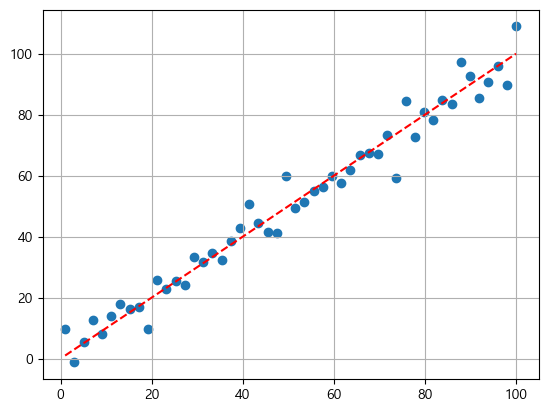

In [3]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.grid()

In [4]:
# 선형회귀
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()

In [5]:
x

array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
        41.40816327,  43.42857143,  45.44897959,  47.46938776,
        49.48979592,  51.51020408,  53.53061224,  55.55102041,
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
m1.fit(x, y)
y_pred1 = m1.predict(x)

In [8]:
y_pred1

array([[ 2.34114275],
       [ 4.31079343],
       [ 6.2804441 ],
       [ 8.25009478],
       [10.21974546],
       [12.18939613],
       [14.15904681],
       [16.12869749],
       [18.09834816],
       [20.06799884],
       [22.03764952],
       [24.00730019],
       [25.97695087],
       [27.94660155],
       [29.91625222],
       [31.8859029 ],
       [33.85555358],
       [35.82520425],
       [37.79485493],
       [39.76450561],
       [41.73415628],
       [43.70380696],
       [45.67345764],
       [47.64310831],
       [49.61275899],
       [51.58240967],
       [53.55206034],
       [55.52171102],
       [57.4913617 ],
       [59.46101237],
       [61.43066305],
       [63.40031373],
       [65.3699644 ],
       [67.33961508],
       [69.30926576],
       [71.27891643],
       [73.24856711],
       [75.21821779],
       [77.18786846],
       [79.15751914],
       [81.12716982],
       [83.09682049],
       [85.06647117],
       [87.03612185],
       [89.00577253],
       [90

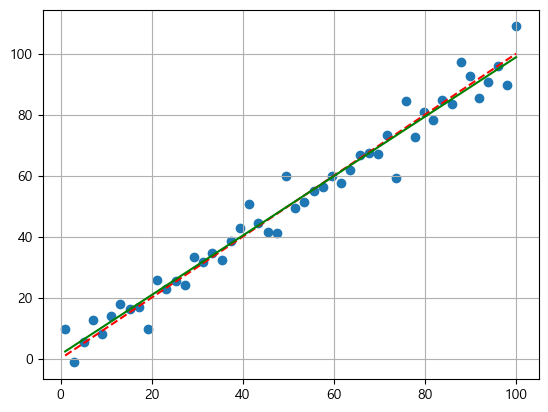

In [9]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred1, color= 'green', linestyle = '-')
plt.grid()

# 결정트리 decision tree

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [11]:
m2 = DecisionTreeRegressor()
m2.fit(x,y)

DecisionTreeRegressor()

In [12]:
y_pred2 = m2.predict(x)

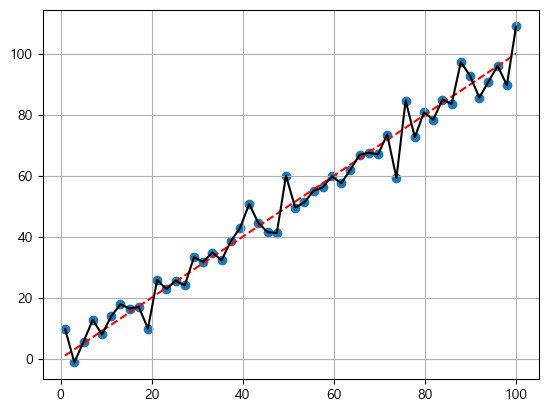

In [13]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
#plt.plot   (x, y_pred1, color= 'green', linestyle = '-')
plt.plot   (x, y_pred2, color= 'black', linestyle = '-')
plt.grid()

In [14]:
y.reshape(1,-1) == y_pred2.reshape(1,-1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]])

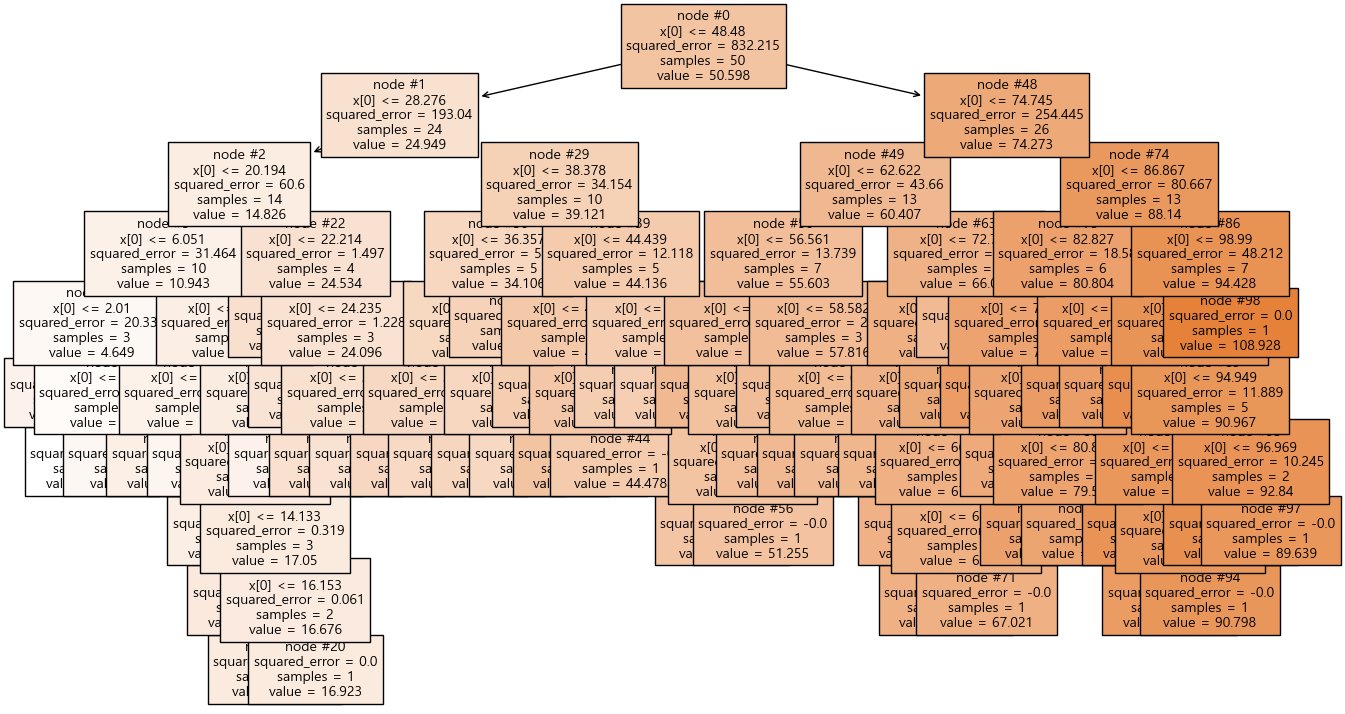

In [15]:
plt.figure(figsize=(16,9))
plot_tree(m2, filled=True, impurity=True, node_ids=True, fontsize=10)
plt.show()

In [16]:
m3 = DecisionTreeRegressor(max_depth=2)
m3.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [17]:
y_pred3 = m3.predict(x)

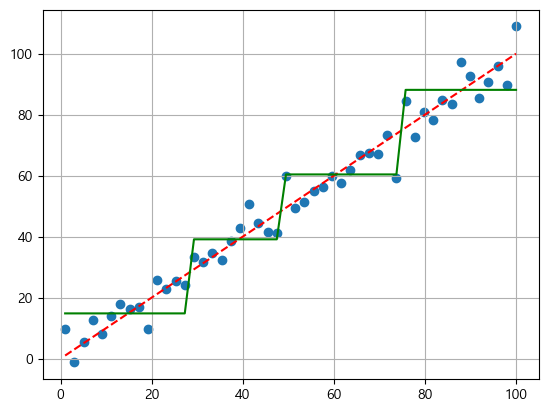

In [18]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred3, color= 'green', linestyle = '-')
plt.grid()

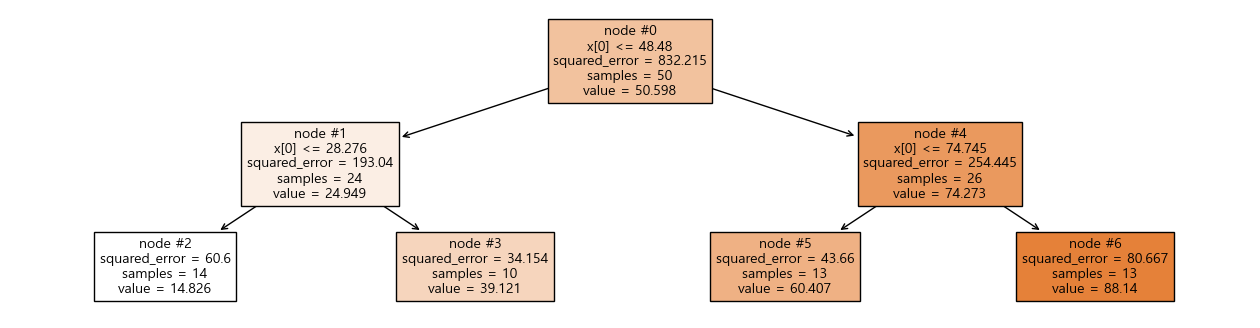

In [19]:
plt.figure(figsize=(16,4))
plot_tree(m3, filled=True, impurity=True, node_ids=True, fontsize=10)
plt.show()

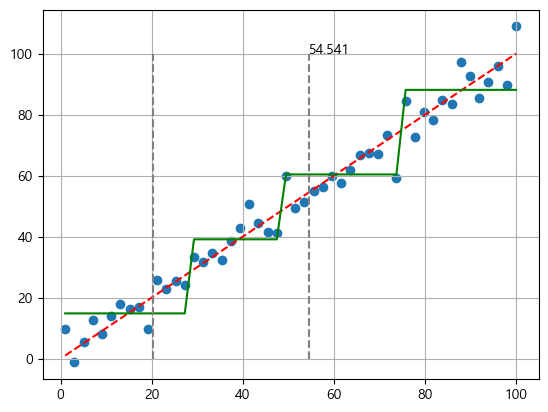

In [20]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred3, color= 'green', linestyle = '-')
# 노드의 분류기준을 표시
plt.vlines(x=54.541, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.vlines(x=20.194, ymin=0, ymax=100, colors='gray', linestyles='--')
#plt.vlines(x=10.573, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=54.543, s='54.541')
plt.grid()

In [21]:
y_pred3

array([14.82623594, 14.82623594, 14.82623594, 14.82623594, 14.82623594,
       14.82623594, 14.82623594, 14.82623594, 14.82623594, 14.82623594,
       14.82623594, 14.82623594, 14.82623594, 14.82623594, 39.1209335 ,
       39.1209335 , 39.1209335 , 39.1209335 , 39.1209335 , 39.1209335 ,
       39.1209335 , 39.1209335 , 39.1209335 , 39.1209335 , 60.40662208,
       60.40662208, 60.40662208, 60.40662208, 60.40662208, 60.40662208,
       60.40662208, 60.40662208, 60.40662208, 60.40662208, 60.40662208,
       60.40662208, 60.40662208, 88.1397301 , 88.1397301 , 88.1397301 ,
       88.1397301 , 88.1397301 , 88.1397301 , 88.1397301 , 88.1397301 ,
       88.1397301 , 88.1397301 , 88.1397301 , 88.1397301 , 88.1397301 ])

### x의 범위가 더 늘어났을 때 ( 훈련데이터에 포함되지 않은 테스트 데이터)

In [22]:
# y = a * x + b
more_x = np.linspace(-100,200,50).reshape(-1,1)
more_y_ori = more_x
more_y = more_x + np.random.normal(0,5,len(more_x)).reshape(-1,1)
more_y_ori = more_x

In [23]:
more_y_pred1 = m1.predict(more_x)

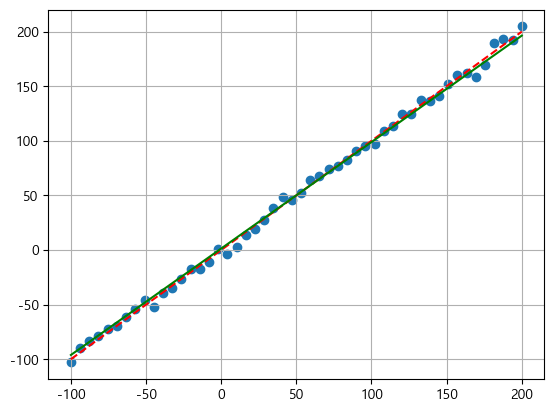

In [24]:
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'red', linestyle = '--')
plt.plot   (more_x, more_y_pred1, color= 'green', linestyle = '-')
plt.grid()

In [25]:
#y_pred2 = m2.predict(x) # 0~100
more_y_pred2 = m2.predict(more_x) # -100 ~ 200

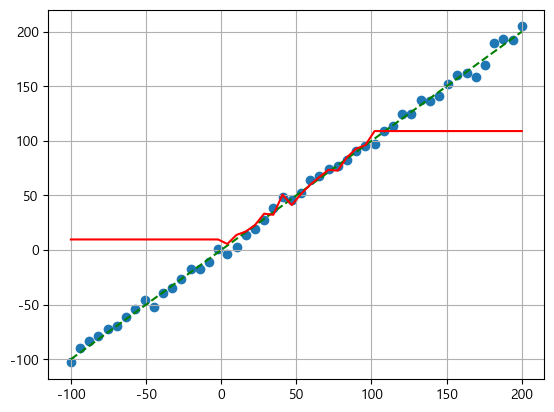

In [26]:
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.plot   (more_x, more_y_pred2, color= 'red', linestyle = '-')
plt.grid()

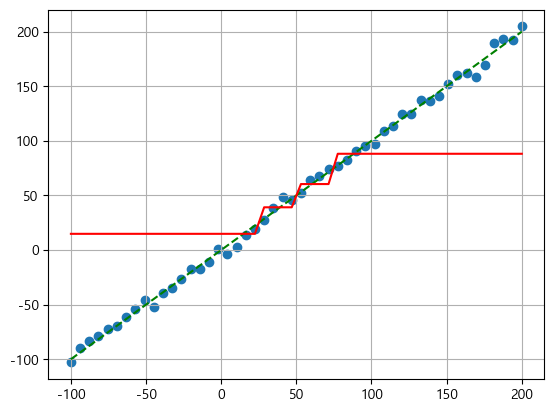

In [27]:
more_y_pred3 = m3.predict(more_x) # -100 ~ 200
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.plot   (more_x, more_y_pred3, color= 'red', linestyle = '-')
plt.grid()

# 랜덤포레스트

In [28]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor()

In [29]:
m4.fit(x, y.ravel())

RandomForestRegressor()

In [30]:
y_pred4 = m4.predict(x)

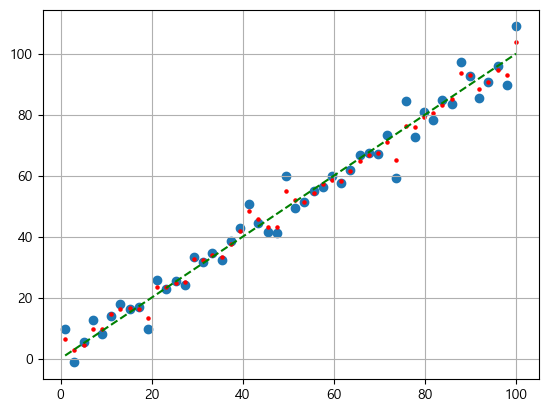

In [31]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'green', linestyle = '--')
plt.scatter(x, y_pred4, color= 'red', linestyle = '-', s=5)
plt.grid()

In [32]:
more_y_pred4 = m4.predict(more_x)

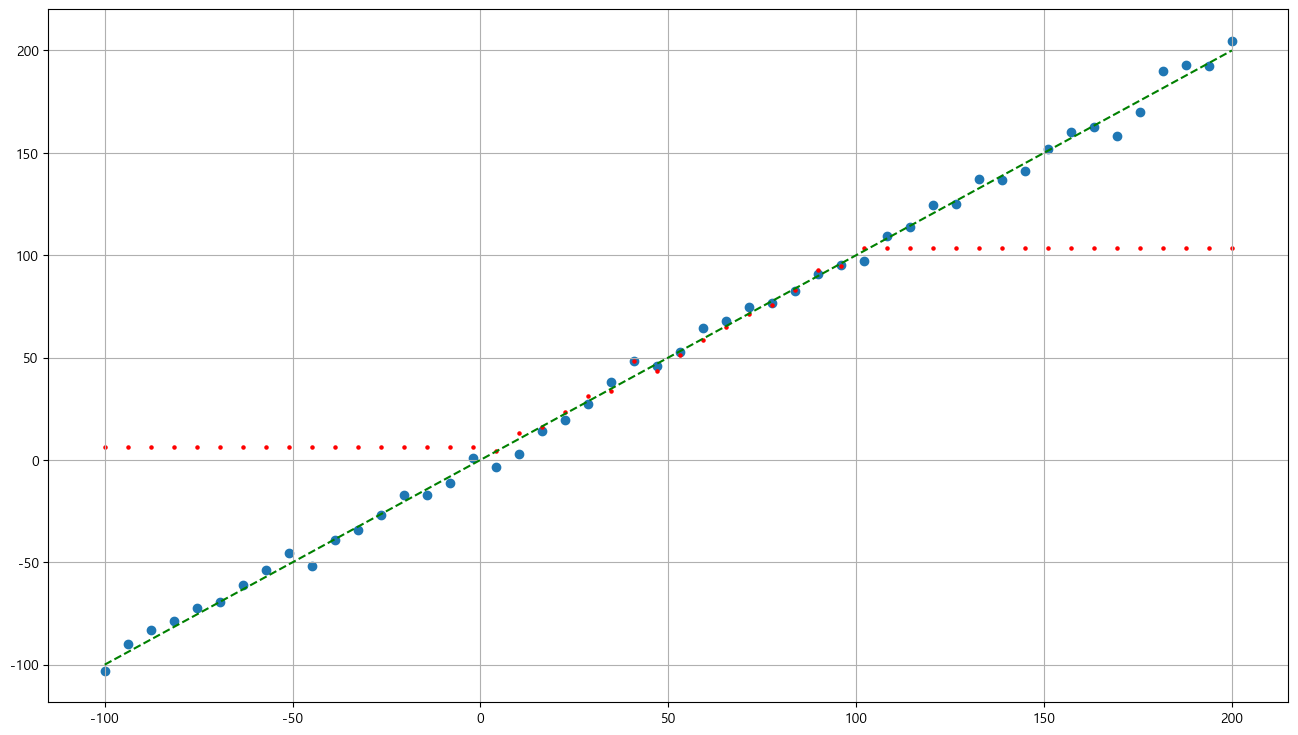

In [33]:
#more_y_pred3 = m3.predict(more_x) # -100 ~ 200
plt.figure(figsize=(16,9))
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.scatter   (more_x, more_y_pred4, color= 'red', linestyle = '-', s=5)
plt.grid()

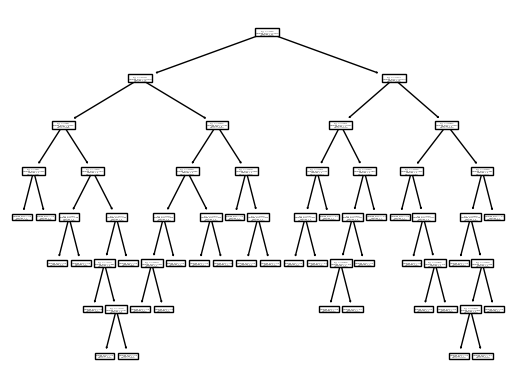

In [34]:
_ = plot_tree(m4.estimators_[0])

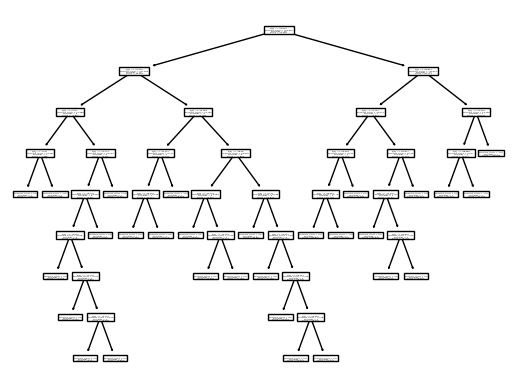

In [35]:
_ = plot_tree(m4.estimators_[1])

In [36]:
m4.estimators_[9].random_state

1888263155

In [37]:
n_samples = len(x)
random_state = np.random.RandomState(m4.estimators_[0].random_state)
sample_list = random_state.choice(n_samples, n_samples, replace=True)

In [38]:
len(sample_list), sample_list

(50,
 array([12, 27, 42, 39, 13,  5, 43,  1, 44, 33, 44, 47, 20,  3, 16, 15,  9,
        27, 47, 30, 26, 25,  2, 10,  8,  2, 29,  3, 27, 25, 13, 27,  6, 48,
         4, 16, 12, 31, 46, 37, 42, 48, 23,  4, 15, 23, 37, 38,  4, 22]))

In [39]:
len(set(sample_list))

32

In [40]:
34/50

0.68

### 부트스트랩 샘플링 시각화

In [41]:
n_samples = len(x)
random_state = np.random.RandomState(m4.estimators_[1].random_state)
sample_list = random_state.choice(n_samples, n_samples, replace=True)

In [42]:
sample_list, len(set(sample_list)) # 이 예시에서 1은 4회 추출됨.

(array([27,  7, 12, 23, 49, 40, 24, 30, 43, 49, 28, 21,  8, 35, 32, 44, 27,
        20,  9, 41,  7, 18, 26, 43, 39, 28, 15, 18,  6, 28,  9, 37, 44, 26,
        37, 33, 40, 20,  2, 26, 26, 23, 41, 15,  1, 14, 49, 12,  3,  1]),
 29)

In [43]:
sample_x = x[sample_list]
sample_y = y[sample_list]

In [44]:
len(np.unique(sample_x)), len(np.unique(sample_y))

(29, 29)

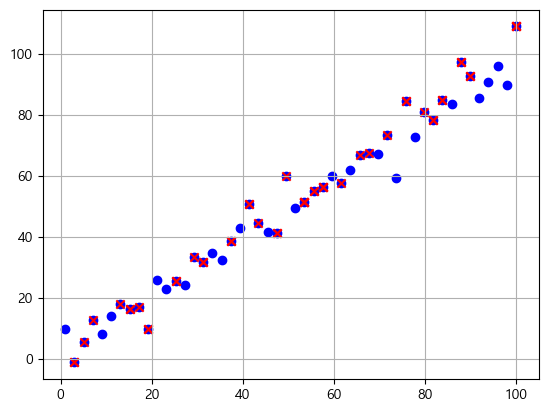

In [45]:
plt.scatter(x,               y, color='blue')
plt.scatter(sample_x, sample_y, color='red',  marker='x')
plt.grid()

# dtreeviz 라이브러리

In [50]:
import dtreeviz

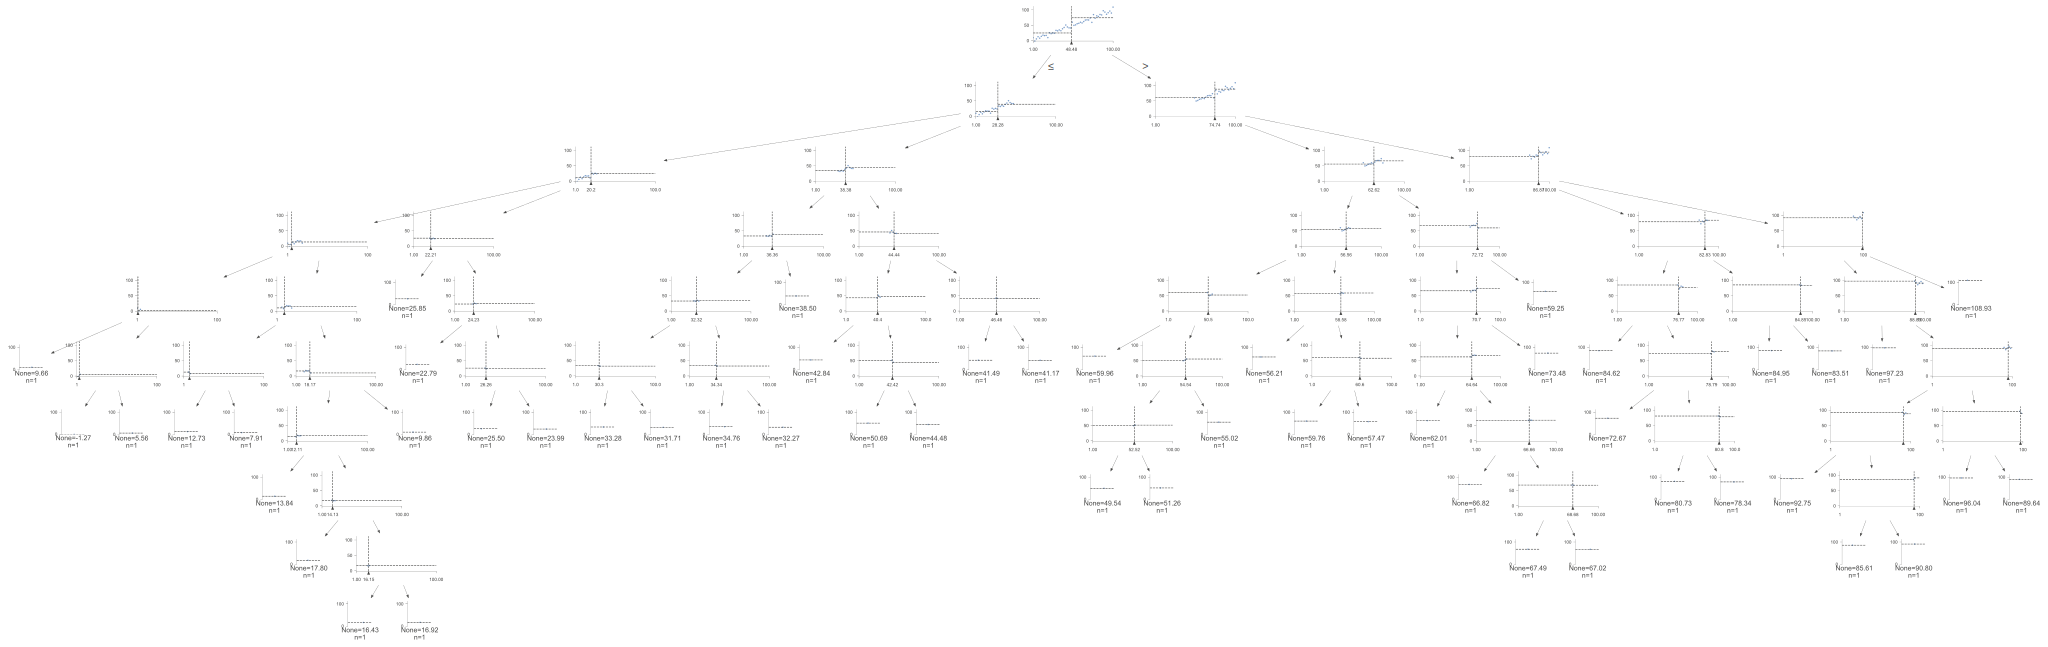

In [74]:
dtreeviz.model(m2, x, y).view(scale=1)

## iris dataset

In [75]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [102]:
load_iris().__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [126]:
iris_x = load_iris().data
iris_y = load_iris().target
target_name = list(load_iris().target_names)
feature_names = list(load_iris().feature_names)

iris_model_dt1 = DecisionTreeClassifier()

In [185]:
iris_model_dt1.fit(iris_x, iris_y)

DecisionTreeClassifier()

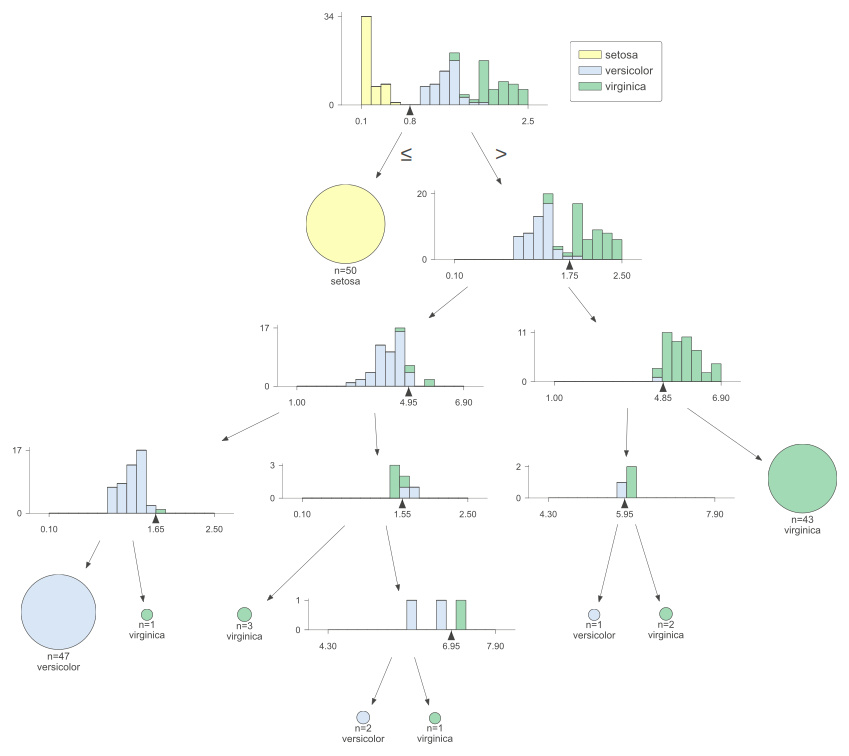

In [197]:
dtreeviz.model(iris_model_dt1, 
               iris_x, 
               iris_y, 
               class_names=list(load_iris().target_names)).view(scale=1.5)

## 펭귄 데이터셋 이용

In [145]:
dataset_address = 'https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv'
# Load a dataset into a Pandas Dataframe.
df_penguins = pd.read_csv(dataset_address)
df_penguins.sample(8)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
168,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,female,2007
217,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,male,2008
207,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,male,2008
167,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,male,2007
222,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,female,2008
283,Chinstrap,Dream,51.3,18.2,197.0,3750.0,male,2007
161,Gentoo,Biscoe,46.8,15.4,215.0,5150.0,male,2007
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009


In [136]:
df_penguins.columns[df_penguins.isna().any()].tolist()

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

In [149]:
df_penguins = df_penguins.dropna()

In [168]:
penguin_sex = "species"   # Name of the classification target label
classes = list(df_penguins['sex'].unique())
df_penguins['sex'] = df_penguins['sex'].map(classes.index)


In [177]:
penguin_label = "species"   # Name of the classification target label
classes = list(df_penguins[penguin_label].unique())
df_penguins[penguin_label] = df_penguins[penguin_label].map(classes.index)

In [178]:
penguins_x = df_penguins[['bill_length_mm',
                         'bill_depth_mm',
                         'flipper_length_mm',
                         'body_mass_g', 'sex']]
penguins_y = df_penguins['species']

In [179]:
# Train a Random Forest model
penguin_model = DecisionTreeClassifier()
penguin_model.fit(penguins_x,penguins_y )

DecisionTreeClassifier()

In [180]:
penguin_features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g', 'sex']

c:\Users\pooko\.conda\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


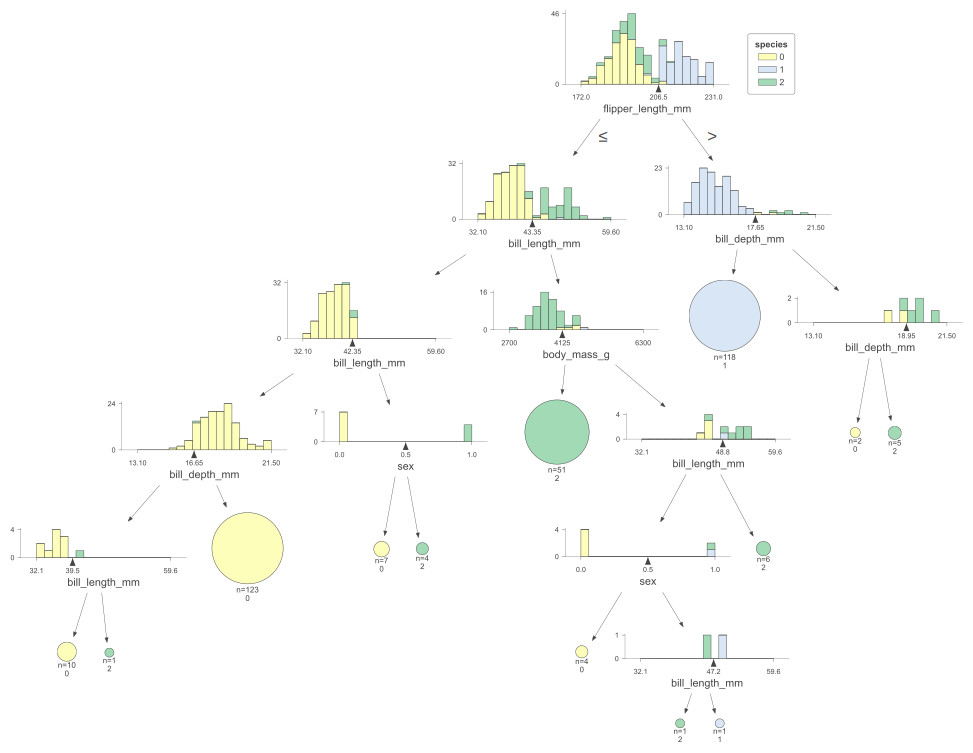

In [183]:
viz_cmodel = dtreeviz.model(penguin_model,
                           tree_index=3,
                           X_train=penguins_x,
                           y_train=penguins_y,
                           feature_names=penguin_features,
                           target_name=penguin_label,
                           class_names=classes)
viz_cmodel.view(scale=1.2)

## wine dataset

In [198]:
from sklearn.datasets import load_wine

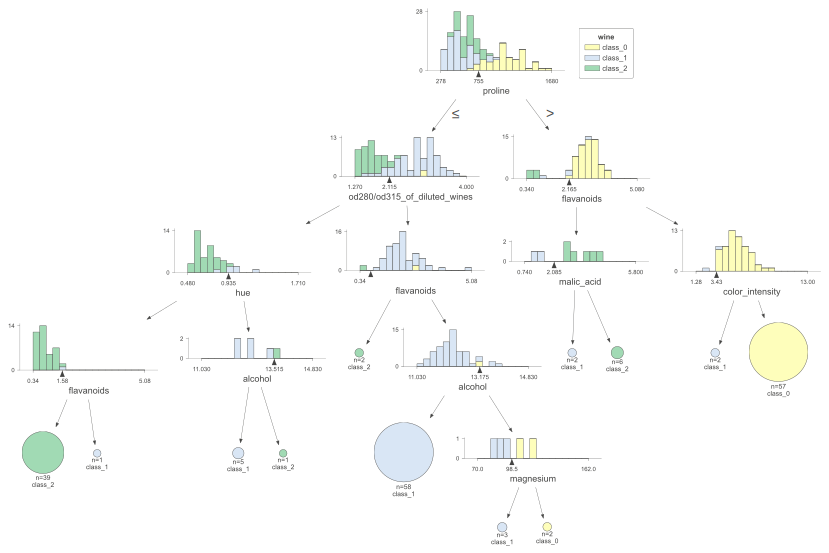

In [203]:
wine_m = DecisionTreeClassifier()
wine = load_wine()

wine_m.fit(wine.data, wine.target)

viz = dtreeviz.model(wine_m,
                     wine.data,
                     wine.target, 
                     target_name='wine',
                     feature_names=wine.feature_names,
                     class_names=list(wine.target_names))
viz.view()

## reference
https://github.com/parrt/dtreeviz/blob/master/notebooks/classifier-decision-boundaries.ipynb